# Oasis Infobytes : Data Science Internship

### Task 5 : Sales Prediction using Python
### Name of Intern : Shivthare Ankita Pradip
### Batch : March P-2 OIB-SIP

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Step 2: Loading the Dataset

In [2]:
data=pd.read_csv("C:/Users/ankit/Downloads/Advertising.csv")
data.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [4]:
data.shape

(200, 5)

In [5]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
data.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
data.count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
# to check the null missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Step 3: Exploratory Data Analysis

In [11]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

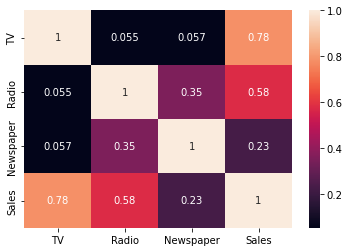

In [12]:
sns.heatmap(data.corr(),annot=True)

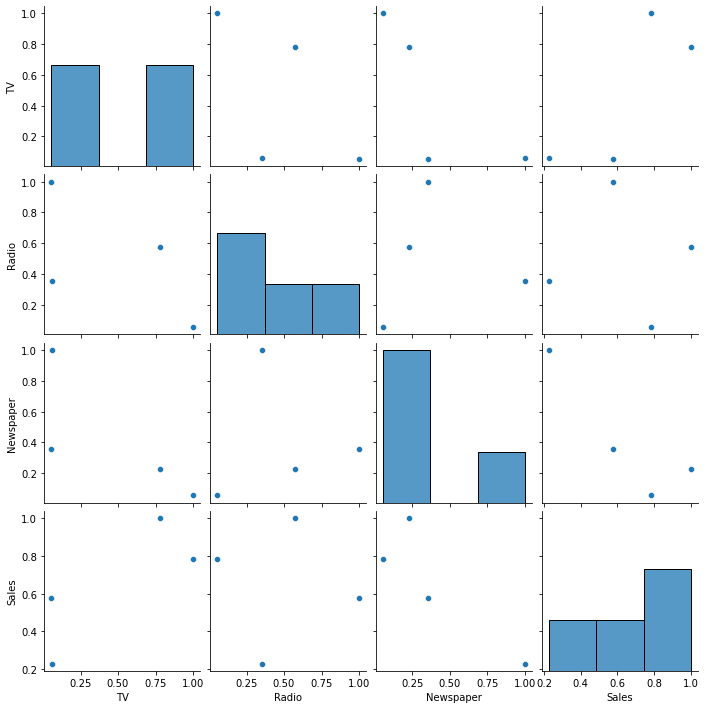

In [13]:
sns.pairplot(data.corr())

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

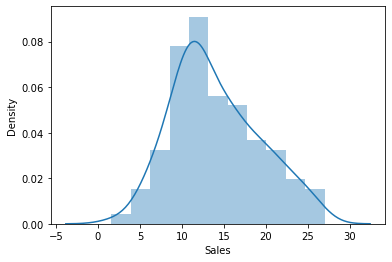

In [14]:
sns.distplot(data['Sales'])

<AxesSubplot:xlabel='TV', ylabel='Sales'>

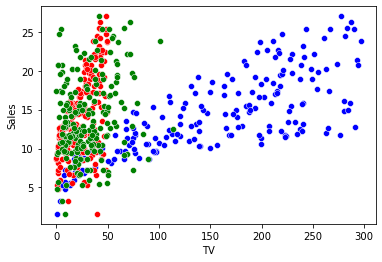

In [15]:
sns.scatterplot(x='TV',y='Sales',data=data,color='blue')
sns.scatterplot(x='Radio',y='Sales',data=data,color='red')
sns.scatterplot(x='Newspaper',y='Sales',data=data,color='green')

### From the figure it show that if advertisement on tv increases then sales increases

## Step 4: Model Building

In [16]:
df=['TV','Radio','Newspaper']

In [17]:
x=data[df]
y=data['Sales']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [19]:
L=LinearRegression()
L.fit(x_train,y_train)

LinearRegression()

In [20]:
L.coef_

array([0.04405928, 0.1992875 , 0.00688245])

In [21]:
L.intercept_

2.7089490925159083

In [22]:
y_pred=L.predict(x_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [23]:
act_pred=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_pred.flatten()
})

In [24]:
act_pred.head(10)

,Actual,Predict
0,16.9,16.565396
1,22.4,21.188228
2,21.4,21.551071
3,7.3,10.889238
4,24.7,22.202320
5,12.6,13.355569
6,22.3,21.196925
7,8.4,7.350285
8,11.5,13.275471
9,14.9,15.124495


<AxesSubplot:>

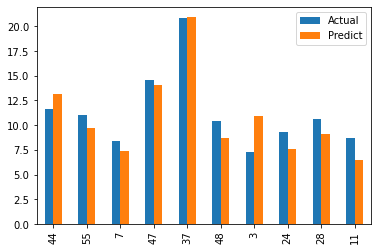

In [25]:
act_pred.sample(10).plot(kind='bar')

In [26]:
r2=L.score(x,y)
print('Coefficient of determination:',r2)

Coefficient of determination: 0.8938708191740677


In [27]:
new=[[500,300,200]]
print(L.predict(new))

[85.90132909]


#### The above output suggest that if we invest 500 dollars on TV , 300 dollars on Radio and 200 dollars on Newspaper advertising we can expect to sell 85 units.

# Thank You!!